![title](attention.png)

# Imports

In [1]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Data Input

In [2]:
input_1 = np.array([1, 0, 1], dtype="float32") # King
input_2 = np.array([0, 2, 0], dtype="float32") # Queen
input_3 = np.array([-1, -1, 1], dtype="float32") #Mobile

# Vector Visualization

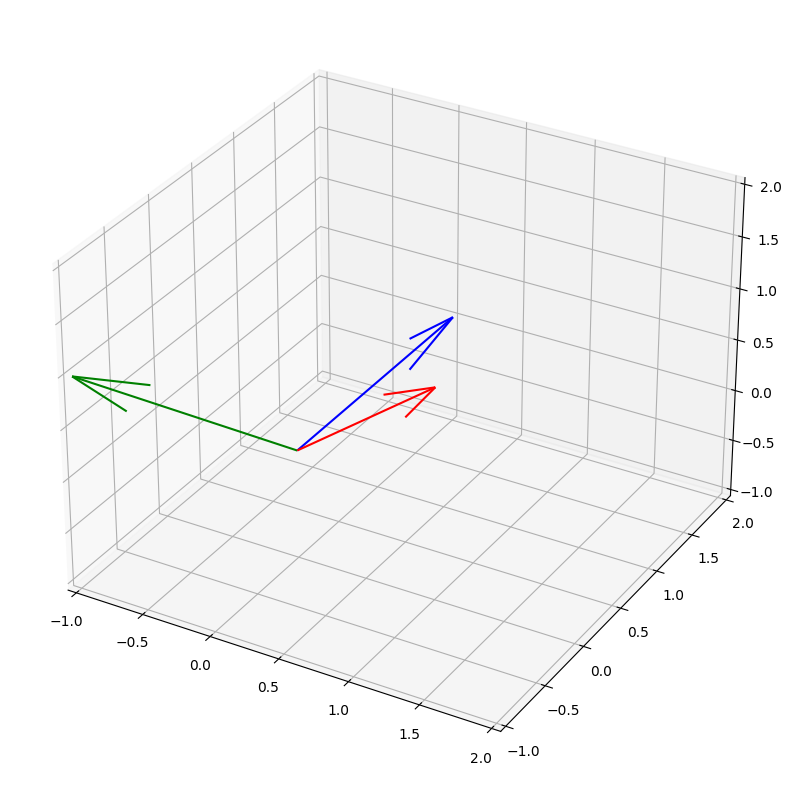

In [3]:
fig = plt.figure()
fig.set_size_inches(18,10)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,1,0,1, color="red")
ax.quiver(0,0,0,0,2,0, color="blue")
ax.quiver(0,0,0,-1,-1,1, color="green")
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
plt.show()

# Initializing Q, K, V Matrices

In [4]:
wq = np.array([[1, 0, 1],
               [1, 2, 0],
               [0, 0, 1],
               ])

In [5]:
wk = np.array([[0, 0, 1],
               [1, 1, 0],
               [0, 1, 0],
               ])

In [6]:
wv = np.array([[0, 1, 0],
               [0, 4, 0],
               [1, 0, 2],
               ])

In [7]:
print(input_1.dot(wq))

[1. 0. 2.]


In [8]:
print(input_2.dot(wq))

[2. 4. 0.]


In [9]:
print(input_3.dot(wq))

[-2. -2.  0.]


In [10]:
inputs = np.vstack([input_1,
                    input_2,
                    input_3
                   ])

In [11]:
inputs

array([[ 1.,  0.,  1.],
       [ 0.,  2.,  0.],
       [-1., -1.,  1.]], dtype=float32)

In [12]:
print(inputs.dot(wq))

[[ 1.  0.  2.]
 [ 2.  4.  0.]
 [-2. -2.  0.]]


# Calculate Representations for Q, K, V

In [13]:
query_rep = inputs.dot(wq)
key_rep = inputs.dot(wk)
value_rep = inputs.dot(wv)

In [14]:
query_rep_dim = np.array([float(query_rep.shape[0])**0.5], 
                         dtype='float32')

In [15]:
query_rep_dim

array([1.7320508], dtype=float32)

In [16]:
step_1 = query_rep.dot(key_rep.transpose())

In [17]:
step_2 = step_1/ query_rep_dim

In [18]:
step_1

array([[ 2.,  2., -3.],
       [ 4., 12., -2.],
       [-2., -8.,  2.]])

In [19]:
step_2

array([[ 1.15470056,  1.15470056, -1.73205084],
       [ 2.30940112,  6.92820335, -1.15470056],
       [-1.15470056, -4.61880224,  1.15470056]])

In [20]:
attn_score_softmax = softmax(step_2, axis=1)

In [21]:
print(attn_score_softmax)

[[4.86438803e-01 4.86438803e-01 2.71223933e-02]
 [9.76525879e-03 9.89929078e-01 3.05663452e-04]
 [9.00925722e-02 2.81999763e-03 9.07087430e-01]]


In [22]:
attn_score_softmax.shape

(3, 3)

In [23]:
value_rep.shape

(3, 3)

# Calculate Attention

In [24]:
attention_final = attn_score_softmax.dot(value_rep)

In [25]:
attention_final

array([[ 0.5135612 ,  4.24233726,  1.02712239],
       [ 0.01007092,  7.92766956,  0.02014184],
       [ 0.99718   , -4.4227846 ,  1.99436   ]])

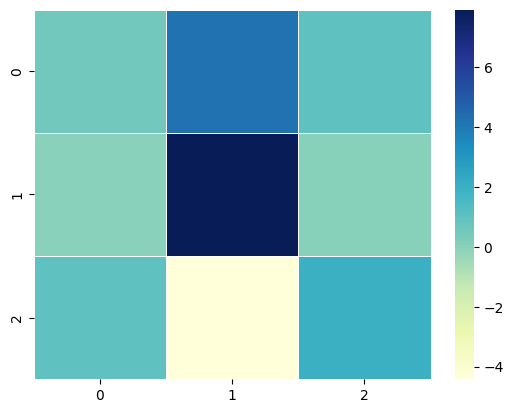

In [26]:
ax = sns.heatmap(attention_final, linewidth= 0.5, cmap="YlGnBu")

# Calculate Attention (Method 2)

In [27]:
weighted_values = value_rep[:, None] * attn_score_softmax.T[:, :, None]

In [28]:
weighted_values.shape

(3, 3, 3)

In [29]:
weighted_values

array([[[ 4.86438803e-01,  4.86438803e-01,  9.72877607e-01],
        [ 9.76525879e-03,  9.76525879e-03,  1.95305176e-02],
        [ 9.00925722e-02,  9.00925722e-02,  1.80185144e-01]],

       [[ 0.00000000e+00,  3.89151043e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.91943262e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.25599810e-02,  0.00000000e+00]],

       [[ 2.71223933e-02, -1.35611966e-01,  5.42447865e-02],
        [ 3.05663452e-04, -1.52831726e-03,  6.11326904e-04],
        [ 9.07087430e-01, -4.53543715e+00,  1.81417486e+00]]])

In [30]:
attention_final_2 = np.sum(weighted_values, axis=0)

In [31]:
attention_final_2

array([[ 0.5135612 ,  4.24233726,  1.02712239],
       [ 0.01007092,  7.92766956,  0.02014184],
       [ 0.99718   , -4.4227846 ,  1.99436   ]])